<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)** Бойцов Иван Юрьевич

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Сиды фиксируем, чтобы полученный нами результат можно было воспроизвести на другом компьютере третьим лицом.
С фиксированным сидом генераторы случайных чисел дают один и тот же результат.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [7]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [12]:
print("В df_train есть пропуски.")
print(f"В стобцах mileage и engine по {6999 - 6797} пропуска.")
print(f"В стобце max_power {6999 - 6803} пропусков.")
print(f"В стобце torque {6999 - 6796} пропуска.")
print(f"В стобце seats {6999 -  6797} пропуска.")

В df_train есть пропуски.
В стобцах mileage и engine по 202 пропуска.
В стобце max_power 196 пропусков.
В стобце torque 203 пропуска.
В стобце seats 202 пропуска.


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


In [16]:
print("В df_test есть пропуски.")
print(f"В стобцах mileage, engine, max_power, torque, seats по {1000 - 981} пропусков.")

В df_test есть пропуски.
В стобцах mileage, engine, max_power, torque, seats по 19 пропусков.


In [18]:
n = sum(df_train.duplicated())
if n == 0:
    print('В датасете df_train нет полных дублей.')
else:
    print(f'В датасете df_train {n} полных дублей.')

В датасете df_train 985 полных дублей.


In [20]:
df_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6994    False
6995    False
6996    False
6997     True
6998     True
Length: 6999, dtype: bool

In [22]:
df_train[6997:6999]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [24]:
n = sum(df_test.duplicated())
if n == 0:
    print('В датасете df_test нет полных дублей.')
else:
    print(f'В датасете df_test {n} полных дублей.')

В датасете df_test 62 полных дублей.


In [26]:
#pip install ydata-profiling

In [28]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="df_train Profiling Report")
profile.to_file('df_train.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_test, title="df_test Profiling Report")
profile.to_file('df_test.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
from ydata_profiling import ProfileReport
vertical_concat = pd.concat([df_train, df_test], axis=0)
profile = ProfileReport(vertical_concat, title="Profiling Report")
profile.to_file('df.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/ivan/anaconda3/lib/python3.12/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Выводы

Есть пропуски в данных, есть дубликаты.
Есть сильные корреляции:
km_driven is highly overall correlated with year
selling_price is highly overall correlated with transmission and 1 other fields
year is highly overall correlated with km_driven and selling_price 
transmission is highly overall correlated with selling_price

Полагаю, что тестовый дата-сет недостаточно репрезентативен, так как статистики признаков (размах) сильно отличаются по изменчивости хотя и схожи по форме графиков (распределению):
1) name (1924 значения в train против 621 в test);
2) year (1983 - 2020 годы в train против 1995 - 2020 в test);
3) selling_price (29999 - 10000000 в train против 31000 - 6000000 в test);
4) и т.д.

seller_type is highly imbalanced (51.9%)
В объединённом дата-сете seller_type:
1) Individual 6663 объекта;
2) Dealer	1102 объекта;
3) Trustmark Dealer 234 объекта.
Мало наблюдений для продавца вида 'Trustmark Dealer'.

In [32]:
df_train['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [34]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [35]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [37]:
df_train.describe(include = object)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [38]:
df_test.describe(include = object)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [39]:
x = df_train.describe()
x.columns = ['year_train', 'selling_price_train', 'km_driven_train', 'seats_train']
y = df_test.describe()
y.columns = ['year_test', 'selling_price_test', 'km_driven_test', 'seats_test']
table = pd.concat([x, y], axis=1)[['year_train', 'year_test', 'selling_price_train', 'selling_price_test',	'km_driven_train', 'km_driven_test', 	'seats_train', 'seats_test']]
table

,year_train,year_test,selling_price_train,selling_price_test,km_driven_train,km_driven_test,seats_train,seats_test
count,6999.000000,1000.000000,6.999000e+03,1.000000e+03,6.999000e+03,1000.000000,6797.000000,981.000000
mean,2013.818403,2013.681000,6.395152e+05,6.179010e+05,6.958462e+04,71393.341000,5.419008,5.410805
std,4.053095,4.012149,8.089419e+05,7.585539e+05,5.772400e+04,48486.218662,0.965767,0.919985
min,1983.000000,1995.000000,2.999900e+04,3.100000e+04,1.000000e+00,1303.000000,2.000000,4.000000
25%,2011.000000,2011.000000,2.549990e+05,2.500000e+05,3.500000e+04,37000.000000,5.000000,5.000000
50%,2015.000000,2014.000000,4.500000e+05,4.349990e+05,6.000000e+04,61500.000000,5.000000,5.000000
75%,2017.000000,2017.000000,6.750000e+05,6.700000e+05,9.700000e+04,100000.000000,5.000000,5.000000
max,2020.000000,2020.000000,1.000000e+07,6.000000e+06,2.360457e+06,375000.000000,14.000000,9.000000


Сравните среднее и медиану внутри train, внутри test и между собой. О чём могут говорить результаты?

In [42]:
# table = pd.concat([x, y], axis=1)[['year_train', 'year_test', 'selling_price_train', 'selling_price_test',	'km_driven_train', 'km_driven_test', 	'seats_train', 'seats_test']]
table_first = table.copy()
table.iloc[[1, 5]]

,year_train,year_test,selling_price_train,selling_price_test,km_driven_train,km_driven_test,seats_train,seats_test
mean,2013.818403,2013.681,639515.197171,617901.042,69584.615517,71393.341,5.419008,5.410805
50%,2015.000000,2014.000,450000.000000,434999.000,60000.000000,61500.000,5.000000,5.000000


selling_price_train, km_driven_train  содержат выбросы, как в train, так и в test, поэтому медиана и среднее отличаются как внутри, так и между датасетами.
Для проверки статистической значимости различий требуется проводить статистические тесты.

Различия остальных признаков выглядят менее значимыми.
Например year_train (медиана на 1 год больше, чем среднее.  year_test(медиана и и среднее очень бизки). Разница между train и test не более года.

Выводы: медианы и средние достаточно близки, распределение признаков близко к нормальному.
Для проверки статистической значимости различий требуется проведение статистических тестов.

### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [53]:
df_train   #.drop_duplicates()
df_train.shape

(6999, 13)

In [55]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [57]:
wonder = df_train.groupby(['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']).agg(count = ('selling_price', 'count'))
wonder[wonder['count'] > 1]

,,,,,,,,,,,,count
name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,
Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0,2
Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0,2
Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0,6
BMW 3 Series 320d Luxury Line,2012,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0,2
BMW 3 Series 320d Luxury Line Plus,2017,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
Volkswagen Polo 2015-2019 1.5 TDI Highline Plus,2018,40000,Diesel,Dealer,Manual,First Owner,20.14 kmpl,1498 CC,88 bhp,230Nm@ 1500-2500rpm,5.0,2
Volkswagen Vento 1.5 TDI Highline AT,2016,60000,Diesel,Individual,Automatic,First Owner,22.15 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0,2
Volkswagen Vento Diesel Highline,2012,90000,Diesel,Individual,Manual,First Owner,20.54 kmpl,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0,3


In [59]:
print('624 объекта с одинаковым признаковым описанием.')

624 объекта с одинаковым признаковым описанием.


In [61]:
df_train = df_train.groupby(['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']).agg(selling_price = ('selling_price', lambda x: x[0:1])).reset_index()

In [63]:
#'selling_price'
df_train.shape

(5653, 13)

In [65]:
df_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price
0,Ambassador CLASSIC 1500 DSL AC,2000,90000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1489 CC,35.5 bhp,72.9Nm@ 2250rpm,5.0,75000
1,Ambassador Classic 2000 DSZ AC PS,1994,100000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,99000
2,Ambassador Grand 2000 DSZ PW CL,2008,80000,Diesel,Individual,Manual,Third Owner,13.5 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0,200000
3,Audi A3 35 TDI Premium Plus,2017,70000,Diesel,Individual,Automatic,First Owner,20.38 kmpl,1968 CC,143 bhp,320Nm@ 1750-3000rpm,5.0,2600000
4,Audi A3 35 TDI Premium Plus,2018,20000,Diesel,Individual,Automatic,First Owner,20.38 kmpl,1968 CC,143 bhp,320Nm@ 1750-3000rpm,5.0,3000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5648,Volvo V40 Cross Country D3,2013,72500,Diesel,Individual,Automatic,Second Owner,23.3 kmpl,1984 CC,150 bhp,350Nm@ 1500-2750rpm,5.0,1200000
5649,Volvo V40 D3 R-Design,2018,2000,Diesel,Dealer,Automatic,First Owner,16.8 kmpl,1984 CC,150 bhp,350Nm@ 1500-2750rpm,5.0,2475000
5650,Volvo XC40 D4 Inscription BSIV,2019,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,3800000
5651,Volvo XC40 D4 R-Design,2018,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,3400000


In [67]:
assert df_train.shape == (5840, 13)

AssertionError: 

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [70]:
# your code here
for i in ['mileage', 'engine', 'max_power', 'torque']:
    df_train[i].info()
    print(df_train[i].head(2), end = '\n\n')

<class 'pandas.core.series.Series'>
RangeIndex: 5653 entries, 0 to 5652
Series name: mileage
Non-Null Count  Dtype 
--------------  ----- 
5653 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB
0    12.8 kmpl
1    12.8 kmpl
Name: mileage, dtype: object

<class 'pandas.core.series.Series'>
RangeIndex: 5653 entries, 0 to 5652
Series name: engine
Non-Null Count  Dtype 
--------------  ----- 
5653 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB
0    1489 CC
1    1995 CC
Name: engine, dtype: object

<class 'pandas.core.series.Series'>
RangeIndex: 5653 entries, 0 to 5652
Series name: max_power
Non-Null Count  Dtype 
--------------  ----- 
5653 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB
0    35.5 bhp
1      52 bhp
Name: max_power, dtype: object

<class 'pandas.core.series.Series'>
RangeIndex: 5653 entries, 0 to 5652
Series name: torque
Non-Null Count  Dtype 
--------------  ----- 
5653 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB
0    72.9Nm@ 

In [72]:
# your code here
for i in ['mileage', 'engine', 'max_power', 'torque']:
    df_test[i].info()
    print(df_test[i].head(2), end = '\n\n')

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: mileage
Non-Null Count  Dtype 
--------------  ----- 
981 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
0    14.0 kmpl
1    21.5 kmpl
Name: mileage, dtype: object

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: engine
Non-Null Count  Dtype 
--------------  ----- 
981 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
0    2498 CC
1    1497 CC
Name: engine, dtype: object

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: max_power
Non-Null Count  Dtype 
--------------  ----- 
981 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
0      112 bhp
1    108.5 bhp
Name: max_power, dtype: object

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: torque
Non-Null Count  Dtype 
--------------  ----- 
981 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB
0    260 Nm at 1800

In [74]:
import re
def cut(row):
    if type(row) == float:
        return row
    
    pattern = r'\d+\.?\d+'
    substr = re.findall(pattern, row)
    return substr[0]


for i in ['mileage', 'engine', 'max_power']:
    df_train[i] = df_train[i].apply(cut)
    df_train[i] = df_train[i].astype(float)
    df_test[i] =  df_test[i].apply(cut)
    df_test[i] = df_test[i].astype(float)


In [76]:
# 'torque' разделите его на два: собственно torque и max_torque_rpm

In [78]:
import re

def reg_torque(feature):
    torque = []
    max_torque_rpm = []
    
    # df_train['torque']
    for i in feature:
        if type(i) == float:
            t = np.nan
            mt = np.nan
            torque.append(t)
            max_torque_rpm.append(mt)
            continue
            
        
        #print(i)
        i = i.lower()
        #  72.9Nm@ 2250rpm
        pattern = r'([0-9]+\.*[0-9]*)nm@\s+([0-9]+)rpm'
        substr = re.findall(pattern, i)
        if substr:
            t = float(substr[0][0])
            mt = float(substr[0][1])
            #print(t, mt)
        
    
        #  320Nm@ 1750-3000rpm
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)nm@\s+([0-9]+)-([0-9]+)rpm'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt_l = float(substr[0][1])
                mt_h = float(substr[0][2])
                mt = (mt_l + mt_h)/2
                #print(t, mt_l, mt_h)
    
        #  22.9@ 1,950-4,700(kgm@ rpm)
        #  51@ 1,750-3,000(kgm@ rpm)
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)@\s+(\d,[0-9]+)-(\d,[0-9]+)\(kgm'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                # 1 кгм = 9.80665 Нм
                t = t * 9.80665
                mt_l = ''
                for i in substr[0][1]:
                    if i != ',':
                        mt_l+=i
                mt_l = float(mt_l)
                mt_h = ''
                for i in substr[0][2]:
                    if i != ',':
                        mt_h+=i            
                mt_h = float(mt_h)
                mt = (mt_l + mt_h)/2
                #print(t, mt_l, mt_h)
       
        #  250 Nm at 2750 rpm
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*nm\s*at\s*([0-9]+)\s*rpm'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt = float(substr[0][1])
                #print(t, mt)
    
        #  11.2@ 4,400(kgm@ rpm)
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*@\s*(\d+,?[0-9]+)\s*\(kgm'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                # 1 кгм = 9.80665 Нм
                t = t * 9.80665
                mt = ''
                for i in substr[0][1]:
                    if i != ',':
                        mt+=i
                mt = float(mt)
                #print(t, mt)
        #  380nm(38.7kgm)@ 2500rpm
        #  400 nm /2000 rpm
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*nm.+([0-9]+)\s*rpm'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt = float(substr[0][1])
                #print(t, mt)
    
        #  11.3kgm@ 4700rpm
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*kgm@\s*([0-9]+)\s*rpm'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                # 1 кгм = 9.80665 Нм
                t = t * 9.80665
                mt = float(substr[0][1])
                #print(t, mt)
    
        #  24 kgm at 1900-2750 rpm
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*kgm\s*at\s*(\d+,?[0-9]+)-(\d,*[0-9]+)'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                # 1 кгм = 9.80665 Нм
                t = t * 9.80665
                mt_l = ''
                for i in substr[0][1]:
                    if i != ',':
                        mt_l+=i
                mt_l = float(mt_l)
                mt_h = ''
                for i in substr[0][2]:
                    if i != ',':
                        mt_h+=i            
                mt_h = float(mt_h)
                mt = (mt_l + mt_h)/2
                #print(t, mt_l, mt_h)
        
        
        #  14.9 kgm at 3000 rpm
            if not substr:
                pattern = r'([0-9]+\.*[0-9]*)\s*kgm\s*at\s*(\d,*[0-9]+)\s*rpm'
                substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                # 1 кгм = 9.80665 Нм
                t = t * 9.80665
                mt = ''
                for i in substr[0][1]:
                    if i != ',':
                        mt+=i  
                mt = float(mt)
                #print(t, mt)
        
        #  510@ 1600-2400
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*@\s*([0-9]+)-([0-9]+)'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt_l = float(substr[0][1])
                mt_h = float(substr[0][2])
                mt = (mt_l + mt_h)/2
                #print(t, mt_l, mt_h)
        
        #  210 / 1900
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*\/\s*([0-9]+)'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt = float(substr[0][1])
    
        #  135.4nm@ 2500
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*nm@\s*([0-9]+)\s*'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt = float(substr[0][1])
                #print(t, mt)
    
        #  48@ 3,000+/-500(nm@ rpm)
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*@\s*(\d+,?[0-9]+)\s*\+.+\(nm@\s*rpm\)'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt = ''
                for i in substr[0][1]:
                    if i != ',':
                        mt+=i  
                mt = float(mt)
    
        #  400nm
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*nm$'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt = np.nan

        # 110(11.2)@ 4800
        if not substr:
            pattern = r'([0-9]+\.*[0-9]*)\s*\(.+@\s*([0-9]+)'
            substr = re.findall(pattern, i)
            if substr:
                t = float(substr[0][0])
                mt = float(substr[0][1])
    
    
        
        torque.append(t)
        max_torque_rpm.append(mt)
    
        if not substr:
            print(i)
            print('\n')

    return (torque, max_torque_rpm)
     

In [80]:
# 'torque' разделите его на два: собственно torque и max_torque_rpm
result = reg_torque(df_train['torque'])
df_train['torque'] = result[0]
df_train['max_torque_rpm'] = result[1]

In [82]:
# 'torque' разделите его на два: собственно torque и max_torque_rpm
result = reg_torque(df_test['torque'])
df_test['torque'] = result[0]
df_test['max_torque_rpm'] = result[1]

In [84]:
df_train.describe()

,year,km_driven,mileage,engine,max_power,torque,seats,selling_price,max_torque_rpm
count,5653.000000,5.653000e+03,5653.000000,5653.000000,5653.000000,5653.000000,5653.000000,5.653000e+03,5650.000000
mean,2013.633823,7.337558e+04,19.434352,1435.531222,88.149826,173.716694,5.440297,5.328111e+05,2829.486814
std,3.897620,6.052454e+04,4.049770,492.423366,32.076277,109.958095,0.994776,5.396084e+05,1039.053709
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,4.000000,2.000000,2.999900e+04,0.000000
25%,2011.000000,3.665900e+04,16.800000,1197.000000,68.000000,110.000000,5.000000,2.500000e+05,2000.000000
50%,2014.000000,6.800000e+04,19.400000,1248.000000,81.860000,160.000000,5.000000,4.200000e+05,2400.000000
75%,2017.000000,1.000000e+05,22.320000,1498.000000,100.000000,200.000000,5.000000,6.500000e+05,4000.000000
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,1863.263500,14.000000,1.000000e+07,21800.000000


In [86]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,981.000000,981.000000,981.000000,981.000000,981.000000,977.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1458.882773,91.015627,173.515334,5.410805,2861.904811
std,4.012149,7.585539e+05,48486.218662,3.989872,526.228560,35.207383,105.809160,0.919985,1026.663692
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,4.000000,4.000000,0.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.000000,69.000000,109.834480,5.000000,2050.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,160.000000,5.000000,2500.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.000000,102.000000,205.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,1421.964250,9.000000,5000.000000


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653 entries, 0 to 5652
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5653 non-null   object 
 1   year            5653 non-null   int64  
 2   km_driven       5653 non-null   int64  
 3   fuel            5653 non-null   object 
 4   seller_type     5653 non-null   object 
 5   transmission    5653 non-null   object 
 6   owner           5653 non-null   object 
 7   mileage         5653 non-null   float64
 8   engine          5653 non-null   float64
 9   max_power       5653 non-null   float64
 10  torque          5653 non-null   float64
 11  seats           5653 non-null   float64
 12  selling_price   5653 non-null   int64  
 13  max_torque_rpm  5650 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 618.4+ KB


In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          981 non-null    float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  977 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


In [94]:
numeric_cols = df_train.select_dtypes([int, float]).columns
numeric_cols

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'selling_price', 'max_torque_rpm'],
      dtype='object')

In [96]:
df_train[numeric_cols] = df_train[numeric_cols].fillna(df_train[numeric_cols].median())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5653 entries, 0 to 5652
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5653 non-null   object 
 1   year            5653 non-null   int64  
 2   km_driven       5653 non-null   int64  
 3   fuel            5653 non-null   object 
 4   seller_type     5653 non-null   object 
 5   transmission    5653 non-null   object 
 6   owner           5653 non-null   object 
 7   mileage         5653 non-null   float64
 8   engine          5653 non-null   float64
 9   max_power       5653 non-null   float64
 10  torque          5653 non-null   float64
 11  seats           5653 non-null   float64
 12  selling_price   5653 non-null   int64  
 13  max_torque_rpm  5653 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 618.4+ KB


In [98]:
df_test[numeric_cols] = df_test[numeric_cols].fillna(df_train[numeric_cols].median())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   float64
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


#### Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.

Лучше применить медиану, так как она не чувствительна к выбросам.
Выше мы убедились, что распределение наших признаков похоже на нормальное, но выбросы всё же есть и по некоторым признакам среднее немного смещено.

    
#### Как правильно считать медиану для заполнения? Выберите верное утверждение:
По тренировочным данным для train и test.
Так как в тесте больше данных и мы потом обучим трансформер ставить в проме эти медиана, если на вход будет поступать вектор с пропусками признаков. Значение из большей выборке (train) ближе к тому, что есть в генеральной совокупности. Анализ выше показал, что размах признаков в train сильно больше, чем в test.

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [102]:
for i in ['engine', 'seats']:
    df_train[i] = df_train[i].astype(int)
    df_test[i] = df_test[i].astype(int)

seats возможно рассмотреть как категориальную переменную, так как машины хорошо разбиваются по количеству мест как ордиальному категориальному признаку.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [106]:
df_train.describe()

,year,km_driven,mileage,engine,max_power,torque,seats,selling_price,max_torque_rpm
count,5653.000000,5.653000e+03,5653.000000,5653.000000,5653.000000,5653.000000,5653.000000,5.653000e+03,5653.000000
mean,2013.633823,7.337558e+04,19.434352,1435.531222,88.149826,173.716694,5.440297,5.328111e+05,2829.258889
std,3.897620,6.052454e+04,4.049770,492.423366,32.076277,109.958095,0.994776,5.396084e+05,1038.825015
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,4.000000,2.000000,2.999900e+04,0.000000
25%,2011.000000,3.665900e+04,16.800000,1197.000000,68.000000,110.000000,5.000000,2.500000e+05,2000.000000
50%,2014.000000,6.800000e+04,19.400000,1248.000000,81.860000,160.000000,5.000000,4.200000e+05,2400.000000
75%,2017.000000,1.000000e+05,22.320000,1498.000000,100.000000,200.000000,5.000000,6.500000e+05,4000.000000
max,2020.000000,2.360457e+06,42.000000,3604.000000,400.000000,1863.263500,14.000000,1.000000e+07,21800.000000


In [108]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.339380,1454.87600,90.841670,173.258542,5.403000,2851.281000
std,4.012149,7.585539e+05,48486.218662,3.951757,521.99574,34.893389,104.814396,0.912921,1017.138295
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000,4.000000,0.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,110.000000,5.000000,2118.750000
50%,2014.000000,4.349990e+05,61500.000000,19.400000,1248.00000,82.425000,160.000000,5.000000,2400.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,205.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,1421.964250,9.000000,5000.000000


В train было очень мало пропусков и заполняли их медианой, поэтому распределения сильно не сдвинулись.
В test распределения не изменились, так как пропусков было также мало.
Если заполнять пропуски аномальными данными или если пропусков было очень много, то распределения изменятся.

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

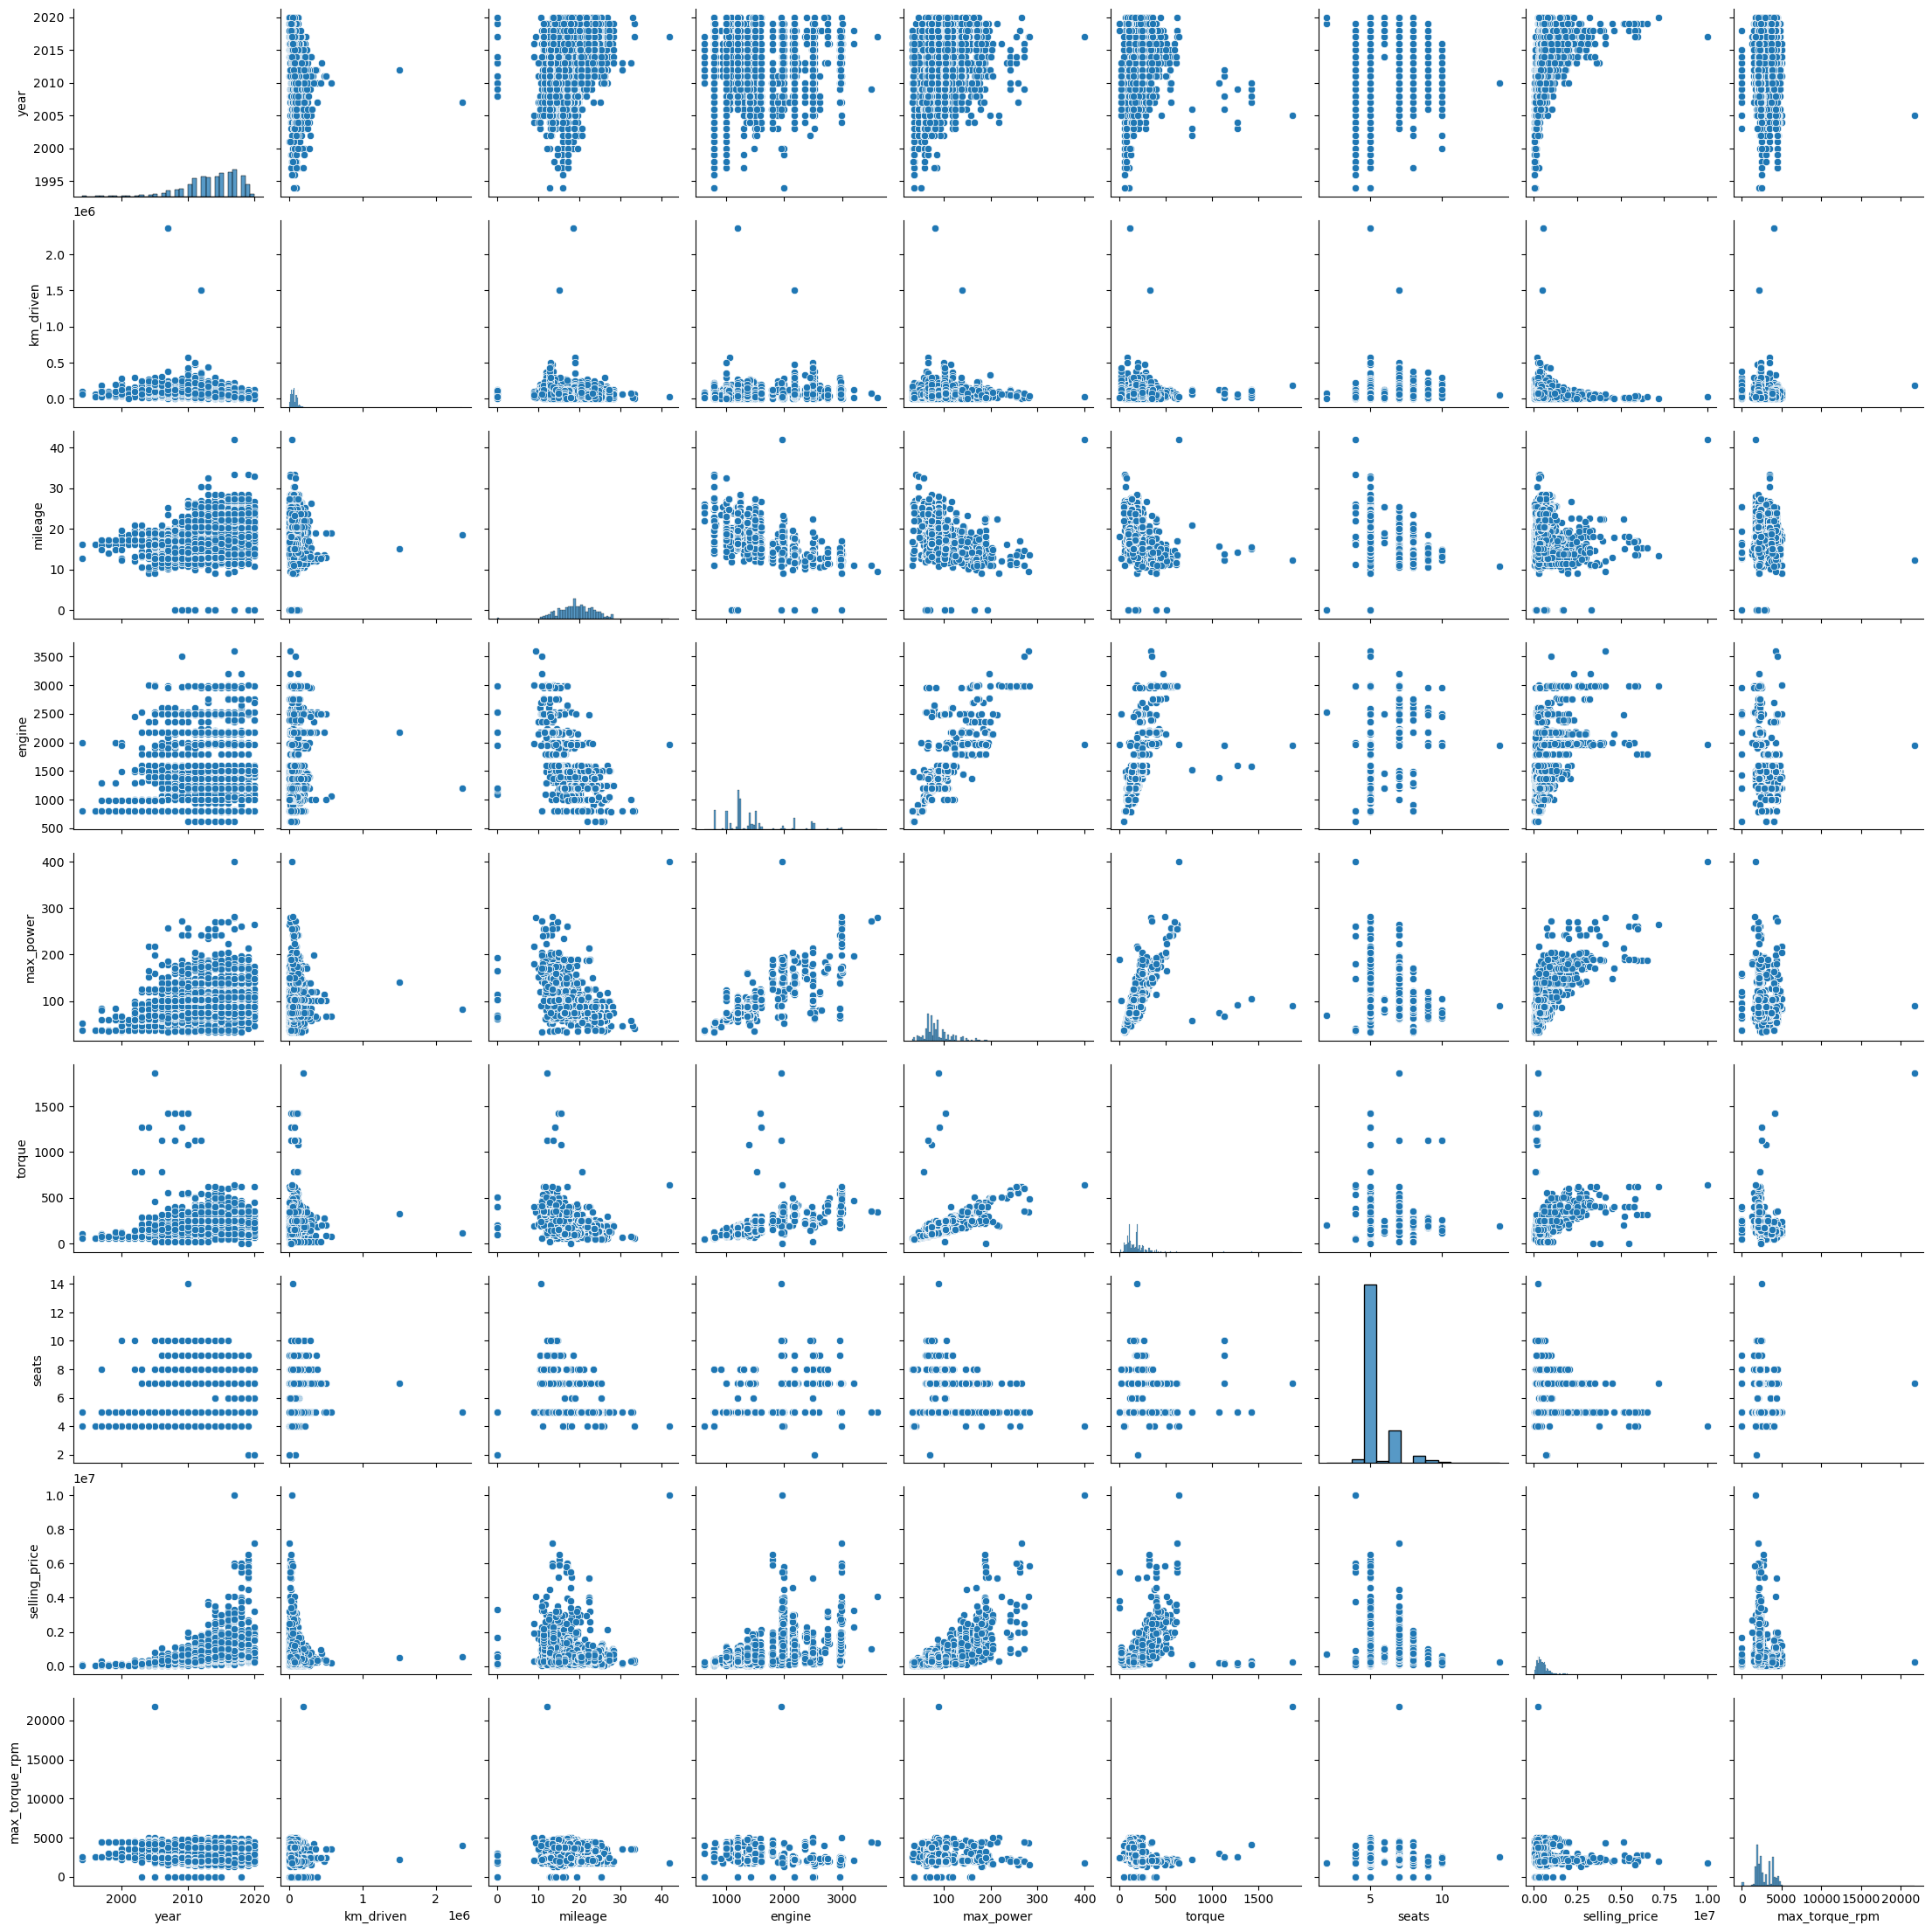

In [132]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import matplotlib
#matplotlib.use('TkAgg')

numeric_cols = df_train.select_dtypes([int, float]).columns
sns.pairplot(df_train[numeric_cols])
plt.show()

In [134]:
#pip install PyQt6
#pip install PySide2

#### Можно ли предположить на основе распределений связь признаков с целевой переменной?
Предполагаю на основе анализа графика линейную связь целевой переменной с признаками:
1) max_power
2) torque
3) engine

#### Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
На основе графика целевая переменная сильно коррелирует с признаками:
1) max_power
2) torque
3) engine

Корелируют пары признаков:
1) max_power и torque
2) engine и torque
3) max_power и engine
4) seats и engine
5) torque и max_torque_rpm


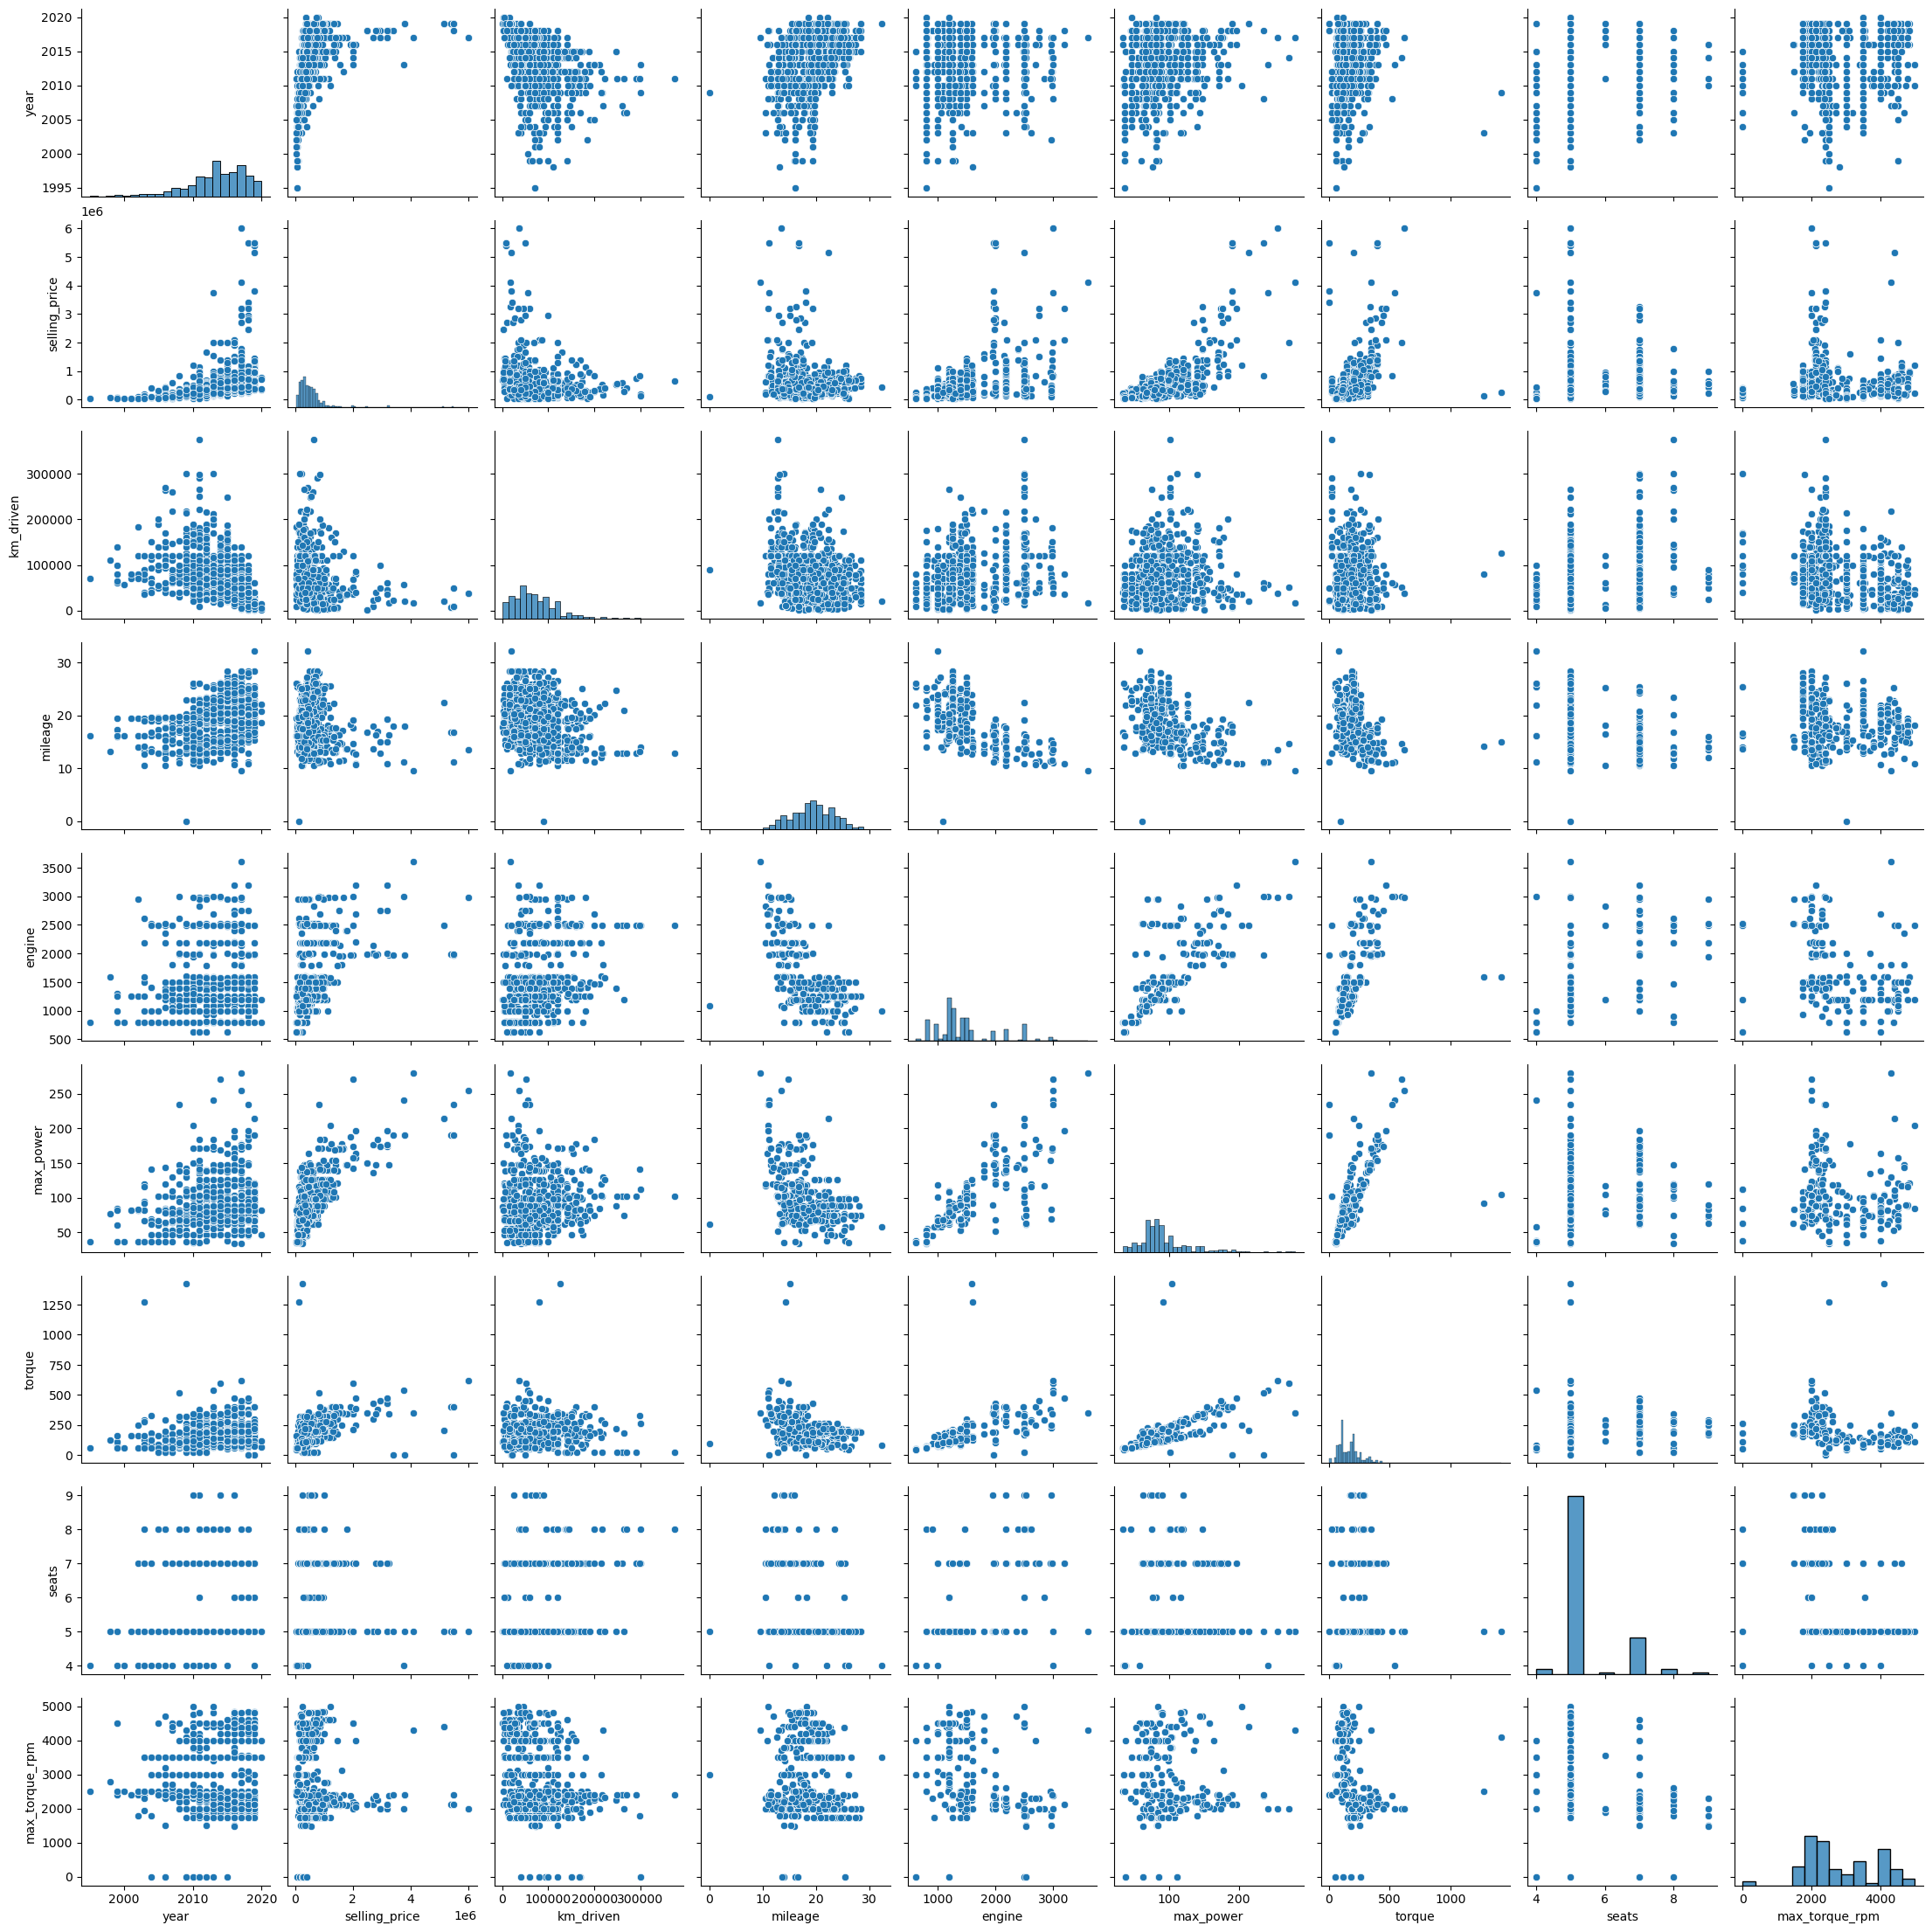

In [137]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import matplotlib
#matplotlib.use('TkAgg')

numeric_cols = df_test.select_dtypes([int, float]).columns
sns.pairplot(df_test[numeric_cols])
plt.show()

#### Похожими ли оказались совокупности при разделении на трейн и тест

Совокупности похожи, но размах на train шире.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [141]:
corr = df_train[numeric_cols].corr()
corr

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.421483,-0.381763,0.362591,-0.017614,0.157598,0.064815,0.022653,0.034541
selling_price,0.421483,1.000000,-0.160666,-0.106300,0.445517,0.696518,0.447943,0.144151,-0.163970
km_driven,-0.381763,-0.160666,1.000000,-0.183449,0.236054,0.026639,0.084476,0.198726,-0.235761
mileage,0.362591,-0.106300,-0.183449,1.000000,-0.575199,-0.374699,-0.205990,-0.452170,-0.064189
engine,-0.017614,0.445517,0.236054,-0.575199,1.000000,0.681640,0.554014,0.651414,-0.407241
max_power,0.157598,0.696518,0.026639,-0.374699,0.681640,1.000000,0.640554,0.242393,-0.144427
torque,0.064815,0.447943,0.084476,-0.205990,0.554014,0.640554,1.000000,0.274876,-0.344235
seats,0.022653,0.144151,0.198726,-0.452170,0.651414,0.242393,0.274876,1.000000,-0.318791
max_torque_rpm,0.034541,-0.163970,-0.235761,-0.064189,-0.407241,-0.144427,-0.344235,-0.318791,1.000000


<Axes: >

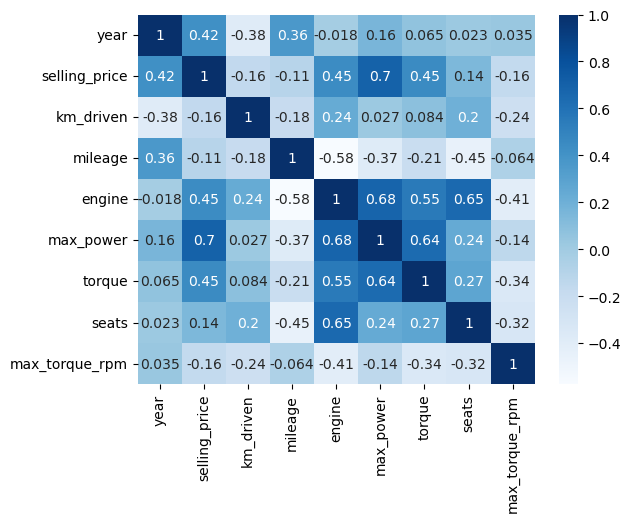

In [154]:
import seaborn as sns
corr = df_train[numeric_cols].corr()
sns.heatmap(corr, cmap = "Blues", annot = True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированы между собой year и engine (-0.017).

Cильная положительная линейная зависимость:
1) year и selling_price
2) year и mileage
3) selling_price и engine		
4) selling_price и max_power
5) selling_price и torque
6) mileage и year
7) engine и max_power
8) engine и torque
9) engine и seats
10) max_power и torque


Правильно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи, так как есть сильная отрицательная корреляция (-0.381763).

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [160]:
corr = df_train[numeric_cols].corr(method = 'spearman')
corr

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.690556,-0.577208,0.356885,-0.042414,0.170101,0.132038,0.030555,0.023527
selling_price,0.690556,1.000000,-0.287902,0.023530,0.476531,0.631214,0.572616,0.311559,-0.237205
km_driven,-0.577208,-0.287902,1.000000,-0.201955,0.307386,0.042221,0.203488,0.205256,-0.317846
mileage,0.356885,0.023530,-0.201955,1.000000,-0.437561,-0.311159,-0.123884,-0.440218,-0.151328
engine,-0.042414,0.476531,0.307386,-0.437561,1.000000,0.719650,0.792225,0.534017,-0.455404
max_power,0.170101,0.631214,0.042221,-0.311159,0.719650,1.000000,0.751800,0.306551,-0.144537
torque,0.132038,0.572616,0.203488,-0.123884,0.792225,0.751800,1.000000,0.375565,-0.618916
seats,0.030555,0.311559,0.205256,-0.440218,0.534017,0.306551,0.375565,1.000000,-0.302492
max_torque_rpm,0.023527,-0.237205,-0.317846,-0.151328,-0.455404,-0.144537,-0.618916,-0.302492,1.000000


In [164]:
#pip install phik -q

Note: you may need to restart the kernel to use updated packages.


In [166]:
import phik
plt.figure(figsize = (14, 14))
ph = df_train[numeric_cols].phik_matrix()
ph

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.169387,0.119938,0.299797,0.330635,0.202006,0.224927,0.347646,0.205816
selling_price,0.169387,1.000000,0.000000,0.649691,0.504582,0.764939,0.691053,0.194369,0.055309
km_driven,0.119938,0.000000,1.000000,0.084203,0.214819,0.000000,0.000000,0.098940,0.000000
mileage,0.299797,0.649691,0.084203,1.000000,0.592833,0.835590,0.367901,0.678161,0.434854
engine,0.330635,0.504582,0.214819,0.592833,1.000000,0.728284,0.606939,0.603353,0.509018
max_power,0.202006,0.764939,0.000000,0.835590,0.728284,1.000000,0.713443,0.416813,0.327706
torque,0.224927,0.691053,0.000000,0.367901,0.606939,0.713443,1.000000,0.330254,0.794935
seats,0.347646,0.194369,0.098940,0.678161,0.603353,0.416813,0.330254,1.000000,0.212377
max_torque_rpm,0.205816,0.055309,0.000000,0.434854,0.509018,0.327706,0.794935,0.212377,1.000000


<Figure size 1400x1400 with 0 Axes>

<Axes: >

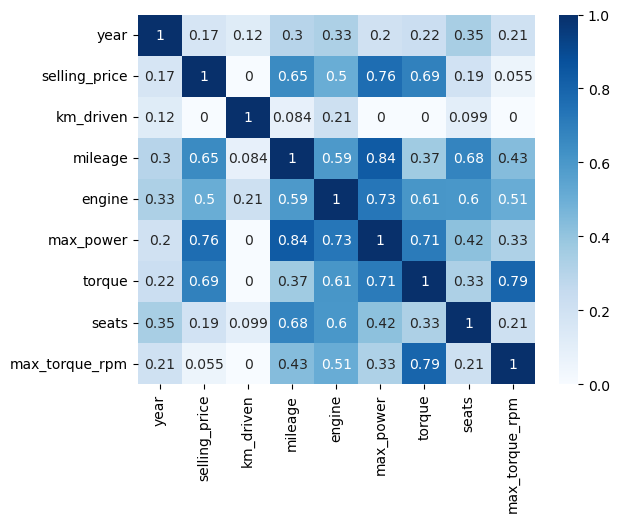

In [168]:
sns.heatmap(ph, cmap = "Blues", annot = True)

В данных есть очень сильные нелинейные взаимосвязи. Нелинейных сильных взаимосвязей сильно больше, чем линейных.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [ ]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [181]:
num_train = df_train[numeric_cols].copy()
x = num_train.drop('selling_price', axis = 1)
y = num_train['selling_price']

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE,  root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [185]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [191]:
X_train.shape

(4239, 8)

In [187]:
assert X_train.shape == (5840, 6)

AssertionError: 

In [193]:
X_test.shape

(1414, 8)

In [189]:
assert X_test.shape == (1000, 6)

AssertionError: 

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [201]:
pred_train = lr.predict(X_train)
print("MSE для train: ", MSE(y_train, pred_train))
print("RMSE для train: ", (MSE(y_train, pred_train))**0.5)

MSE для train:  111879645476.69437
RMSE для train:  334484.1483190113


In [203]:
pred_test = lr.predict(X_test)
print("MSE для test: ", MSE(y_test, pred_test))
print("RMSE для test: ", (MSE(y_test, pred_test))**0.5)

MSE для test:  130976018821.99902
RMSE для test:  361906.0911645437


In [205]:
pred_train = lr.predict(X_train)
print("r2_score для train: ", r2_score(y_train, pred_train))

r2_score для train:  0.6095051373508646


In [207]:
pred_test = lr.predict(X_test)
print("r2_score для test: ", r2_score(y_test, pred_test))

r2_score для test:  0.5703867428951455


r2_score > 0. Модель предсказывает значительно лучше, чем среднее значение. 0.58 для test и 0.6 для train.
RMSE - корень квадратный из средней ошибки достаточно большой и составляет для test 361906.0911645437,
т.е. 67.92 % от средней цены автомобиля.

In [215]:
361906.0911645437 * 100 / 532811.06262 # процент средней ошибки от средней цены автомобиля

67.92390709474712

In [213]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_train['selling_price'].describe()

count       5653.00000
mean      532811.06262
std       539608.42026
min        29999.00000
25%       250000.00000
50%       420000.00000
75%       650000.00000
max     10000000.00000
Name: selling_price, dtype: float64

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [228]:
from sklearn.metrics import r2_score
import statistics as stat
def r2(y_true, y_pred):
    # ваш код
    y_true = list(y_true)
    y_pred = list(y_pred)
    return (1 - (sum([( y_true[i] - y_pred[i])**2 for i in range(len(y_true))]) / sum([( y_true[i] - stat.mean(y_true))**2 for i in range(len(y_true))])) )



print(f'ф-ия r2 для test: {r2(y_test, pred_test)}')
print(f'ф-ия r2 для train: {r2(y_train, pred_train)}')
print(f'ф-ия r2_score для test: {r2_score(y_test, pred_test)}')
print(f'ф-ия r2_score для train: {r2_score(y_train, pred_train)}')
print(f'Проверка на равенство с библиотечной функцией r2_score: {r2_score(y_test, pred_test) == r2(y_test, pred_test)}')

ф-ия r2 для test: 0.5703867428951457
ф-ия r2 для train: 0.6095051373508644
ф-ия r2_score для test: 0.5703867428951455
ф-ия r2_score для train: 0.6095051373508646
Проверка на равенство с библиотечной функцией r2_score: False


$R^2$ - это единица минус доля необъяснённой дисперсии (дисперсии ошибки модели) в дисперсии зависимой переменной.
Изменяется от минус бесконесности до единицы.
Если $R^2$ равен 0, то модель предсказывает среднее значение.
Чем ближе $R^2$ к единице - тем лучше предсказывает модель.
Если $R^2$ меньше 0, то модель предсказывает хуже, чем если бы всегда выдавала среднее значение по целевому признаку.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [240]:
from sklearn.metrics import r2_score
import statistics as stat
def r2_adjusted(y_true, y_pred, n, k):
    # ваш код
    y_true = list(y_true)
    y_pred = list(y_pred)
    r_2 = (1 - (sum([( y_true[i] - y_pred[i])**2 for i in range(len(y_true))]) / sum([( y_true[i] - stat.mean(y_true))**2 for i in range(len(y_true))])) )
    return (1 - (1 - r_2)*(n-1)/(n-k))


print(f'ф-ия r2-adjusted для train: {r2_adjusted(y_train, pred_train, n = X_train.shape[0], k = X_train.shape[1])}')

ф-ия r2-adjusted для train: 0.6088590810902774


Adjusted $R^{2}$ применяется, чтобы сравнивать модели с разным числом независимых переменных так, чтобы их число не влияло на статистику $R^{2}$.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [246]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaler, y_train)

LinearRegression()

In [248]:
pred_train_scaler = lr.predict(X_train_scaler)
print("MSE для train: ", MSE(y_train, pred_train))
print("MSE для train_scaler: ", MSE(y_train, pred_train_scaler))

print()

print("RMSE для train: ", (MSE(y_train, pred_train))**0.5)
print("RMSE для train_scaler: ", (MSE(y_train, pred_train_scaler))**0.5)

print()

pred_test_scaler = lr.predict(X_test_scaler)
print("MSE для test: ", MSE(y_test, pred_test))
print("MSE для test_scaler: ", MSE(y_test, pred_test_scaler))

print()

print("RMSE для test: ", (MSE(y_test, pred_test))**0.5)
print("RMSE для test_scaler: ", (MSE(y_test, pred_test_scaler))**0.5)

print()

pred_train_scaler = lr.predict(X_train_scaler)
print("r2_score для train: ", r2_score(y_train, pred_train))
print("r2_score для train_scaler: ", r2_score(y_train, pred_train_scaler))

print()

pred_test_scaler = lr.predict(X_test_scaler)
print("r2_score для test: ", r2_score(y_test, pred_test))
print("r2_score для test_scaler: ", r2_score(y_test, pred_test_scaler))

MSE для train:  111879645476.69437
MSE для train_scaler:  111879645476.69435

RMSE для train:  334484.1483190113
RMSE для train_scaler:  334484.1483190113

MSE для test:  130976018821.99902
MSE для test_scaler:  130976018821.9989

RMSE для test:  361906.0911645437
RMSE для test_scaler:  361906.0911645435

r2_score для train:  0.6095051373508646
r2_score для train_scaler:  0.6095051373508646

r2_score для test:  0.5703867428951455
r2_score для test_scaler:  0.5703867428951459


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [255]:
features = list(X_train.columns)
coef = list(lr.coef_)
intercept = lr.intercept_
reg = 'selling_price = '
for i in range(len(features)):
    m = ' + '
    if coef[i] < 0:
        m = ' - '
    reg = reg + features[i] + '*' + str(abs(round(coef[i], 2)))
    if i < (len(features) - 1):
        reg = reg + m
    else:
        m = ' + '
        if intercept < 0:
            m = ' - '
        reg = reg + m + str(abs(round(intercept, 2)))
print(reg)

selling_price = year*151464.08 + km_driven*42304.33 - mileage*10339.77 + engine*27064.88 + max_power*342124.27 + torque*5026.47 - seats*29917.34 - max_torque_rpm*50801.04 + 529900.44


Признак max_power с коэффициентом 342124.27 наиболее информативный в предсказании цены.

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [271]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaler, y_train)


y_pred_train_lasso = lasso.predict(X_train_scaler)
y_pred_test_lasso = lasso.predict(X_test_scaler)

print(lasso.coef_,'\n')

print('модель без лассо регуляризации:\n', list(lr.coef_))
#print('Train Lasso MSE:', mean_squared_error(y_train, y_pred_train_lasso))

#print('Test Lasso MSE:', mean_squared_error(y_test, y_pred_test_lasso))


[151464.11955672 -42303.12951958  10337.71455523  27060.00533914
 342123.29418655  -5023.22288005 -29914.71370819 -50800.23379345] 

модель без лассо регуляризации:
 [151464.0806961388, -42304.32876696036, 10339.765412756075, 27064.884154801734, 342124.2739485473, -5026.472388967519, -29917.339857219165, -50801.041431699035]


L1-регуляризация с параметрами по умолчанию не занулила ни один из весов. Веса и качество остались без изменений.

Это может быть связано с тем, что:
1) моедель не переубочена, так как нет большой разницы метрик на train и на test;
2) веса модели примерно одного масштаба, нет явных выбросов;
3) мы обучили модель с регулиризацией только для alpha=1.0. Можно найти значение параметра, который улучшит качество модели и (или) обнулит какие-то веса для линейно-зависимых признаков.

In [266]:
print("MSE для train: ", MSE(y_train, pred_train))
print("MSE для train_scaler: ", MSE(y_train, pred_train_scaler))
print('Train Lasso MSE:', MSE(y_train, y_pred_train_lasso))
print()

print("RMSE для train: ", (MSE(y_train, pred_train))**0.5)
print("RMSE для train_scaler: ", (MSE(y_train, pred_train_scaler))**0.5)
print('Train Lasso RMSE:', (MSE(y_train, y_pred_train_lasso))**0.5)
print()

pred_test_scaler = lr.predict(X_test_scaler)
print("MSE для test: ", MSE(y_test, pred_test))
print("MSE для test_scaler: ", MSE(y_test, pred_test_scaler))
print('Test Lasso MSE:', MSE(y_test, y_pred_test_lasso))
print()

print("RMSE для test: ", (MSE(y_test, pred_test))**0.5)
print("RMSE для test_scaler: ", (MSE(y_test, pred_test_scaler))**0.5)
print('Test Lasso RMSE:', (MSE(y_test, y_pred_test_lasso))**0.5)
print()

pred_train_scaler = lr.predict(X_train_scaler)
print("r2_score для train: ", r2_score(y_train, pred_train))
print("r2_score для train_scaler: ", r2_score(y_train, pred_train_scaler))
print('Train Lasso r2_score:', r2_score(y_train, y_pred_train_lasso))
print()

pred_test_scaler = lr.predict(X_test_scaler)
print("r2_score для test: ", r2_score(y_test, pred_test))
print("r2_score для test_scaler: ", r2_score(y_test, pred_test_scaler))
print('Test Lasso r2_score:', r2_score(y_test, y_pred_test_lasso))

MSE для train:  111879645476.69437
MSE для train_scaler:  111879645476.69435
Train Lasso MSE: 111879645492.4723

RMSE для train:  334484.1483190113
RMSE для train_scaler:  334484.1483190113
Train Lasso RMSE: 334484.14834259683

MSE для test:  130976018821.99902
MSE для test_scaler:  130976018821.9989
Test Lasso MSE: 130975982888.77498

RMSE для test:  361906.0911645437
RMSE для test_scaler:  361906.0911645435
Test Lasso RMSE: 361906.0415201368

r2_score для train:  0.6095051373508646
r2_score для train_scaler:  0.6095051373508646
Train Lasso r2_score: 0.6095051372957947

r2_score для test:  0.5703867428951455
r2_score для test_scaler:  0.5703867428951459
Test Lasso r2_score: 0.5703868607593894


### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

Количество моделей, которые обучит GridSearchCV определяется по формуле - мощность множетсва значений гиперпараметра альфа на количество фолдов кросс-валидации.
В param_grid зададим множетсва значений гиперпараметра альфа.
Веса не занулилимь. Лучший коэффициент регуляризации смотри ниже.

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

#param_dist  = {'alpha' : [i/100 for i in range(1, 2000)]}

param_dist = {'alpha': [0.1, 1.0, 10.0, 100.0]}

model = Lasso()

gs = GridSearchCV(model, param_dist, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train_scaler, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [318]:
-gs.best_score_

115239201315.58823

In [320]:
gs.best_estimator_

Lasso(alpha=100.0)

In [322]:
gs.best_params_

{'alpha': 100.0}

In [324]:
lasso_2 = gs.best_estimator_

In [310]:
y_pred_train_lasso_GS = lasso_2.predict(X_train_scaler)
y_pred_test_lasso_GS = lasso_2.predict(X_test_scaler)


print('модель без лассо регуляризации:\n', list(lr.coef_))
print("RMSE для train_scaler: ", (MSE(y_train, pred_train_scaler))**0.5)
print("r2_score для train_scaler: ", r2_score(y_train, pred_train_scaler))

print()

print(r"модель с лассо регуляризацией {'alpha': 19.99}:",'\n', list(lasso_2.coef_))
print("RMSE для train_scaler lasso_GS: ", (MSE(y_train, y_pred_train_lasso_GS))**0.5)
print("r2_score для train_scaler lasso_GS: ", r2_score(y_train, y_pred_train_lasso_GS))




#print('Train Lasso MSE:', mean_squared_error(y_train, y_pred_train_lasso))

#print('Test Lasso MSE:', mean_squared_error(y_test, y_pred_test_lasso))


модель без лассо регуляризации:
 [151464.0806961388, -42304.32876696036, 10339.765412756075, 27064.884154801734, 342124.2739485473, -5026.472388967519, -29917.339857219165, -50801.041431699035]
RMSE для train_scaler:  334484.1483190113
r2_score для train_scaler:  0.6095051373508646

модель с лассо регуляризацией {'alpha': 19.99}: 
 [151464.7330131436, -42280.23126655704, 10298.368798677067, 26965.460735677356, 342105.55252472, -4961.522256135168, -29864.153189506604, -50785.31815173242]
RMSE для train_scaler lasso_GS:  334484.15786119446
r2_score для train_scaler lasso_GS:  0.6095051150707442


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [332]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

#param_dist  = {'alpha' : [i/100 for i in range(1, 2000)]}

param_dist = {'alpha': [0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.5], 'random_state': [42] }

model = ElasticNet() 

gs = GridSearchCV(model, param_dist, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train_scaler, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.5],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [334]:
-gs.best_score_

115494389794.29277

In [336]:
gs.best_estimator_

ElasticNet(alpha=0.1, random_state=42)

In [338]:
gs.best_params_

{'alpha': 0.1, 'l1_ratio': 0.5, 'random_state': 42}

In [340]:
elastic = gs.best_estimator_
y_pred_train_elastic = elastic.predict(X_train_scaler)
y_pred_test_elastic = elastic.predict(X_test_scaler)


print('модель без лассо регуляризации:\n', list(lr.coef_))
print("RMSE для train_scaler: ", (MSE(y_train, pred_train_scaler))**0.5)
print("r2_score для train_scaler: ", r2_score(y_train, pred_train_scaler))

print()

print(r"модель elastic:",'\n', list(elastic.coef_))
print("RMSE для train_scaler elastic: ", (MSE(y_train, y_pred_train_elastic))**0.5)
print("r2_score для train_scaler elastic: ", r2_score(y_train, y_pred_train_elastic))

модель без лассо регуляризации:
 [151464.0806961388, -42304.32876696036, 10339.765412756075, 27064.884154801734, 342124.2739485473, -5026.472388967519, -29917.339857219165, -50801.041431699035]
RMSE для train_scaler:  334484.1483190113
r2_score для train_scaler:  0.6095051373508646

модель elastic: 
 [148424.30631356942, -43108.31742569962, 11402.882367045, 46753.44182423555, 307738.8494363987, 8972.419759791874, -33228.07145491058, -42732.591589558266]
RMSE для train_scaler elastic:  335243.77021422767
r2_score для train_scaler elastic:  0.6077294760858709


### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [ ]:
# your code here

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 11)

In [ ]:
X_train_cat.describe(include='object')

### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`Your answer here`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [ ]:
def your_business_metrics(y_true, y_pred):

business_metrics(# your code here)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>